In [31]:
import numpy as np                   # Scientific and vector computation library for python
from matplotlib import pyplot as plt # Plotting library
import pandas as pd                  # library for reading and analysing data from a file

# tells matplotlib to embed plots within the notebook
%matplotlib inline                   

In [32]:
data=pd.read_csv("ex1data2-Copy1.txt",header=None) #reads comma-separated data from file and stores in dataframe namely 'data' header=None specifies thee is no header present in the input file

In [33]:
data.describe()                         #displays statistical details of data like mean,standard deviation,etc.

,0,1,2
count,47.000000,47.000000,47.000000
mean,2000.680851,3.170213,340412.659574
std,794.702354,0.760982,125039.899586
min,852.000000,1.000000,169900.000000
25%,1432.000000,3.000000,249900.000000
50%,1888.000000,3.000000,299900.000000
75%,2269.000000,4.000000,384450.000000
max,4478.000000,5.000000,699900.000000


In [41]:
data.head()                 #displays first 5 lines of data stored in dataframe

,0,1,2
0,2104,3,399900
1,1600,3,329900
2,2400,3,369000
3,1416,2,232000
4,3000,4,539900


In [43]:
#computes cost i.e. mean square error
def costfunction(theta,X,y): 
    m=y.shape[0]
    y_pred=np.dot(X,theta)
    error=y_pred-y
    J=0
    J=(1/(2*m))*np.dot(error.T,error)
    return J

In [44]:
#computes gradient of cost with respect to parameters
def gradient(theta,X,y):
    grad=np.dot(X.T,(np.dot(X,theta)-y))
    return grad

In [37]:
#applies batch gradient descent to minimize cost
def gradientdescent(theta,X,y,num_iters,alpha):
    J_history=[]
    m=y.shape[0]
    for i in range(num_iters):
        J_history.append(costfunction(theta,X,y))
        theta=theta - (alpha/m)*gradient(theta,X,y)
        
    return J_history,theta    

In [38]:
#predicts price with given data of size and number of bedrooms
def predict(theta,X):
    y_pred=np.dot(X,theta)
    return y_pred


In [45]:
m,n=data.shape[0],data.shape[1] #m=number of examples, n=number of features + 1(for output price y)
theta=np.zeros([n,1])           #initialize parameter vector theta with zeros
alpha=0.01                      #learning rate = alpha
num_iters=400                   #decide number of iterations for running gradient descent
ones=np.ones([m,1])             
data_n=np.hstack((ones,data))   #adding a vector of ones as the first column


y=data_n[:,3].reshape(m,1)      #assigning output vector its values and reshaping it to (k,1) as a numpy array of shape(k,) causes problems in further calculations sometimes
J_history=[]
X=data_n[:,0:3]                 #assigning input feature vectors to input data variable
X[:,1:]=(X[:,1:]-np.mean(X[:,1:]))/np.std(X[:,1:]) #feature normalisation so that GD converges fast without having any error

print('Initial Cost = '+str(costfunction(theta,X,y)))
J_history,theta=gradientdescent(theta,X,y,num_iters,alpha) #calls gradientdescent function
print('Cost after applying linear regression algo = '+str(costfunction(theta,X,y)))
print('Parameters for regression : '+str(theta))

<class 'numpy.ndarray'>
Initial Cost = [[6.55915481e+10]]
Cost after applying linear regression algo = [[2.06491168e+09]]
Parameters for regression : [[ 119999.41363909]
 [ 148539.68555667]
 [-104839.19814394]]


Text(0, 0.5, 'Cost')

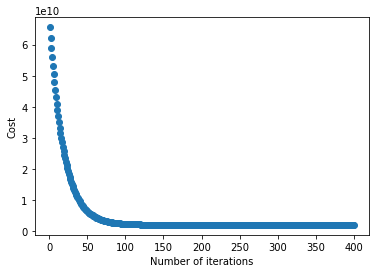

In [46]:
#plots variation of cost with number of iterations
plt.scatter([i for i in range(1,num_iters+1)],J_history)
plt.xlabel("Number of iterations")
plt.ylabel("Cost")